In [2]:
import json
import matplotlib.pyplot as plt

In [3]:

with open("../eval/roberta_cmp.json", "r") as f:
    roberta_results = json.load(f)
roberta_results

{'Air crash': {'precision': {'old': 0.8516483516483516,
   'new': 0.9488636363636364,
   'delta': 0.09721528471528473,
   'support': 176},
  'recall': {'old': 0.8806818181818182,
   'new': 0.9488636363636364,
   'delta': 0.06818181818181812,
   'support': 176},
  'f1-score': {'old': 0.8659217877094972,
   'new': 0.9488636363636364,
   'delta': 0.08294184865413912,
   'support': 176}},
 'Awards ceremony': {'precision': {'old': 0.9333333333333333,
   'new': 1.0,
   'delta': 0.06666666666666665,
   'support': 28},
  'recall': {'old': 1.0, 'new': 1.0, 'delta': 0.0, 'support': 28},
  'f1-score': {'old': 0.9655172413793104,
   'new': 1.0,
   'delta': 0.03448275862068961,
   'support': 28}},
 'Break historical records': {'precision': {'old': 0.7419354838709677,
   'new': 0.8409090909090909,
   'delta': 0.09897360703812319,
   'support': 40},
  'recall': {'old': 0.575,
   'new': 0.925,
   'delta': 0.3500000000000001,
   'support': 40},
  'f1-score': {'old': 0.6478873239436619,
   'new': 0.8809

In [4]:
sorted_by_support = list(map(lambda x: x[0], sorted(roberta_results.items(), key=lambda e: e[1]["f1-score"]["support"], reverse=True)))
sorted_by_support

['Withdraw from an Organization',
 'Air crash',
 'Government Job change - Appoint_Inauguration',
 'Financial Crisis',
 'Government Job change - Resignation_Dismissal',
 'Droughts',
 'Famous Person - Commit Crime - Sentence',
 'Diplomatic Visit',
 'Break historical records',
 'Sports Competition',
 'Famous Person - Commit Crime - Accuse',
 'Riot',
 'Floods',
 'Awards ceremony',
 'Shipwreck',
 'Famous Person - Divorce',
 'Military Exercise',
 'Famous Person - Commit Crime - Investigate',
 'Join in an Organization',
 'Mudslides',
 'Tear Up Agreement',
 'Hurricanes_Tornado_Storm_Blizzard',
 'New archeological discoveries',
 'Organization Fine',
 'Environment Pollution',
 'Tsunamis',
 'Famous Person - Sick',
 'Organization Closed',
 'Famous Person - Marriage',
 'Protest_Online Condemnation']

([<matplotlib.axis.XTick at 0x7fac592e66e0>,
 [Text(0.0, 0, 'Withdraw from an Organization'),
  Text(1.0, 0, 'Air crash'),
  Text(2.0, 0, 'Government Job change - Appoint_Inauguration'),
  Text(3.0, 0, 'Financial Crisis'),
  Text(4.0, 0, 'Government Job change - Resignation_Dismissal'),
  Text(5.0, 0, 'Droughts'),
  Text(6.0, 0, 'Famous Person - Commit Crime - Sentence'),
  Text(7.0, 0, 'Diplomatic Visit'),
  Text(8.0, 0, 'Break historical records'),
  Text(9.0, 0, 'Sports Competition'),
  Text(10.0, 0, 'Famous Person - Commit Crime - Accuse'),
  Text(11.0, 0, 'Riot'),
  Text(12.0, 0, 'Floods'),
  Text(13.0, 0, 'Awards ceremony'),
  Text(14.0, 0, 'Shipwreck'),
  Text(15.0, 0, 'Famous Person - Divorce'),
  Text(16.0, 0, 'Military Exercise'),
  Text(17.0, 0, 'Famous Person - Commit Crime - Investigate'),
  Text(18.0, 0, 'Join in an Organization'),
  Text(19.0, 0, 'Mudslides'),
  Text(20.0, 0, 'Tear Up Agreement'),
  Text(21.0, 0, 'Hurricanes_Tornado_Storm_Blizzard'),
  Text(22.0, 0, 'New

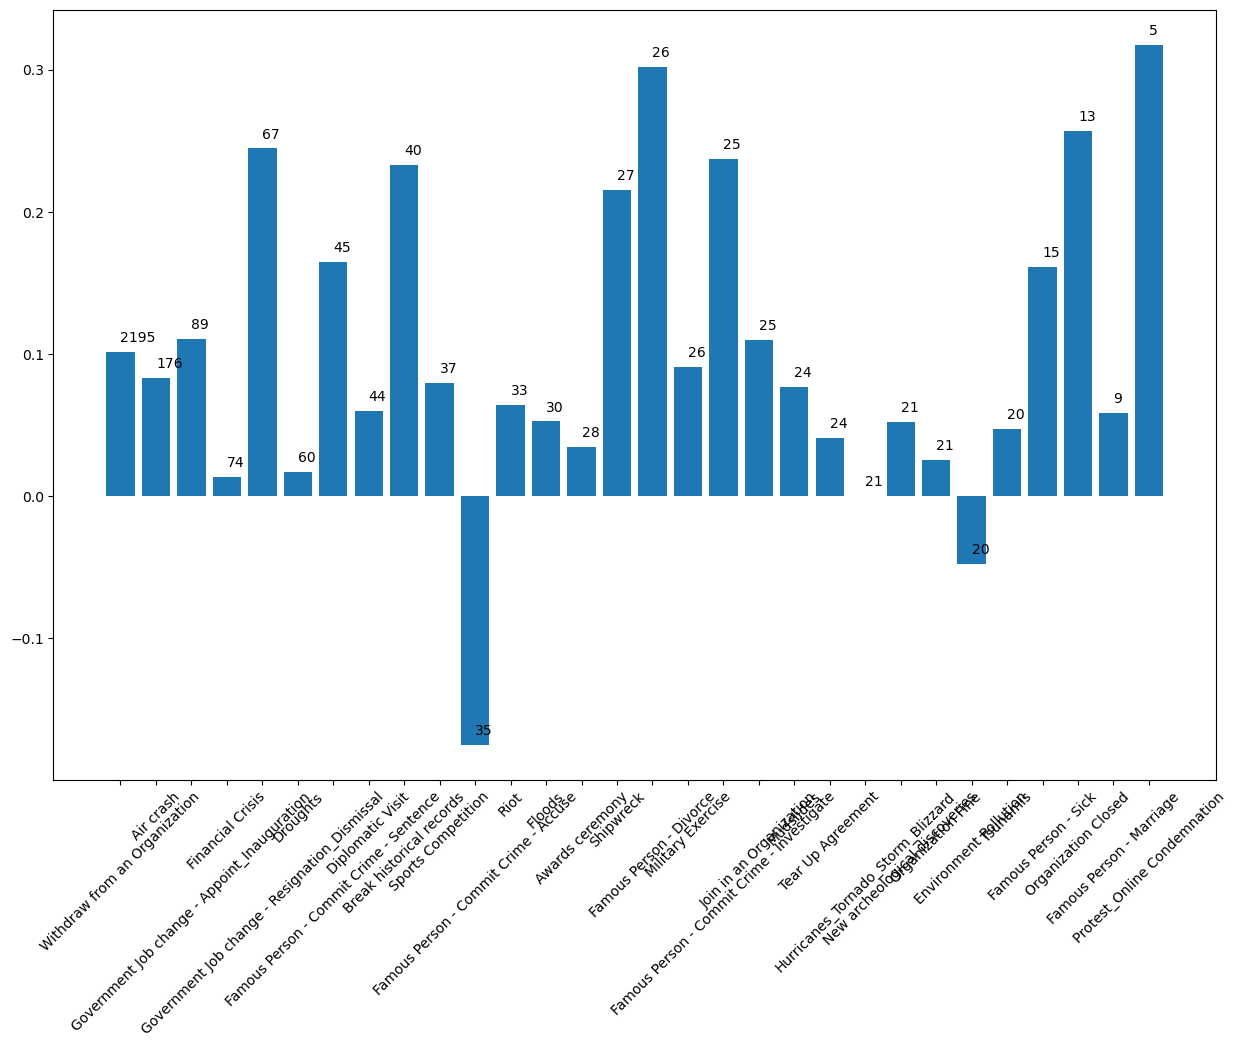

In [5]:
fig = plt.figure(figsize=(15, 10))

y = list(map(lambda c: roberta_results[c]["f1-score"]["delta"], sorted_by_support))

plt.bar(sorted_by_support, y)
for i, value in enumerate(y):
    plt.annotate(
        roberta_results[sorted_by_support[i]]["f1-score"]["support"],
        (sorted_by_support[i], value),
        xytext=(0, 10),
        textcoords="offset pixels"
)

plt.xticks(sorted_by_support, rotation=45)

In [6]:
def showcase_results(results):
    x = list(map(lambda x: x[0], sorted(results.items(), key=lambda e: e[1]["support"], reverse=True)))
    y = list(map(lambda c: results[c]["metrics"]["f1-score"]["delta"], x))
    print(f"{len(x) = }")
    print(f"{len(y) = }")
    fig = plt.figure(figsize=(15, 10))
    plt.bar(x, y)
    for i, value in enumerate(y):
        plt.annotate(
            results[x[i]]["support"],
            (x[i], value),
            xytext=(-10, 10),
            textcoords="offset pixels"
        )
    fig.autofmt_xdate()


len(x) = 61
len(y) = 61


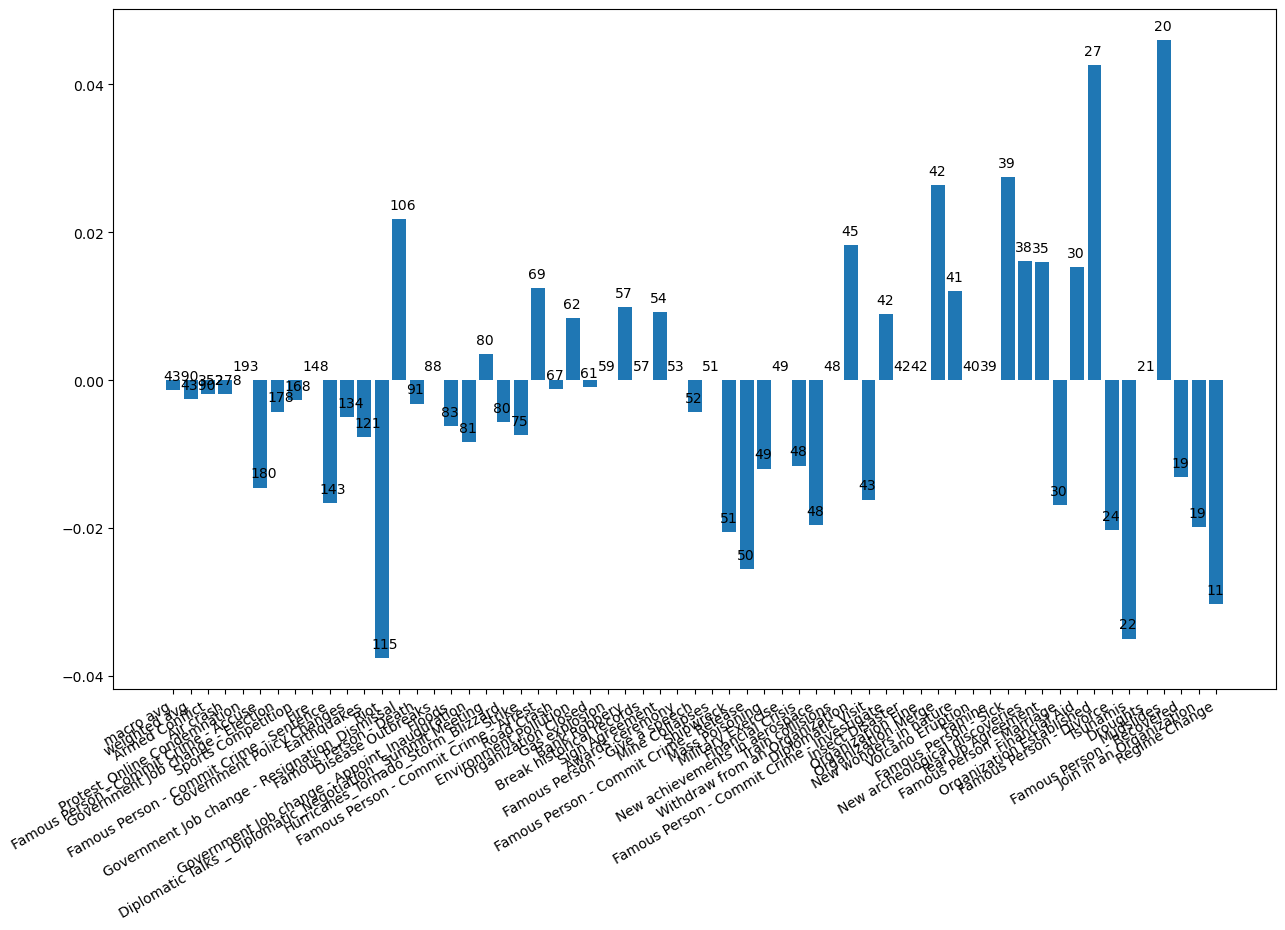

In [7]:
with open("../eval/svm_cmp_withtitle.json", "r") as f:
    svm_results = json.load(f)

showcase_results(svm_results)

In [8]:
with open("../eval/svm_cmp.json", "r") as f:
    svm_results = json.load(f)

scores = [
    "train_all_aug.beam.notitle.nbeans_10.subsample_all.spacynotitle",
    "train_all_aug.beam.notitle.nbeans_10.subsample_all.spacytitle",
    "train_all_aug.beam.notitle.nbeans_10.subsample_one_per_source.spacynotitle",
    "train_all_aug.beam.notitle.nbeans_10.subsample_one_per_source.spacytitle",
    "train_all_aug.beam.notitle.nbeans_10.subsample_unique_text.spacynotitle",
    "train_all_aug.beam.notitle.nbeans_10.subsample_unique_text.spacytitle",
    "train_all_aug.beam.title.nbeans_10.subsample_all.spacynotitle",
    "train_all_aug.beam.title.nbeans_10.subsample_all.spacytitle",
    "train_all_aug.beam.title.nbeans_10.subsample_one_per_source.spacynotitle",
    "train_all_aug.beam.title.nbeans_10.subsample_one_per_source.spacytitle",
    "train_all_aug.beam.title.nbeans_10.subsample_unique_text.spacynotitle",
    "train_all_aug.beam.title.nbeans_10.subsample_unique_text.spacytitle",
    "train_all_aug.contrastive.alpha_0_6.notitle.subsample_all.spacynotitle",
    "train_all_aug.contrastive.alpha_0_6.notitle.subsample_all.spacytitle",
    "train_all_aug.contrastive.alpha_0_6.notitle.subsample_one_per_source.spacynotitle",
    "train_all_aug.contrastive.alpha_0_6.notitle.subsample_one_per_source.spacytitle",
    "train_all_aug.contrastive.alpha_0_6.notitle.subsample_unique_text.spacynotitle",
    "train_all_aug.contrastive.alpha_0_6.notitle.subsample_unique_text.spacytitle",
    "train_all_aug.contrastive.alpha_0_6.title.subsample_all.spacynotitle",
    "train_all_aug.contrastive.alpha_0_6.title.subsample_all.spacytitle",
    "train_all_aug.contrastive.alpha_0_6.title.subsample_one_per_source.spacynotitle",
    "train_all_aug.contrastive.alpha_0_6.title.subsample_one_per_source.spacytitle",
    "train_all_aug.contrastive.alpha_0_6.title.subsample_unique_text.spacynotitle",
    "train_all_aug.contrastive.alpha_0_6.title.subsample_unique_text.spacytitle",
    "train_all_aug.greedy.notitle.subsample_all.spacynotitle",
    "train_all_aug.greedy.notitle.subsample_all.spacytitle",
    "train_all_aug.greedy.notitle.subsample_one_per_source.spacynotitle",
    "train_all_aug.greedy.notitle.subsample_one_per_source.spacytitle",
    "train_all_aug.greedy.notitle.subsample_unique_text.spacynotitle",
    "train_all_aug.greedy.notitle.subsample_unique_text.spacytitle",
    "train_all_aug.greedy.title.subsample_all.spacynotitle",
    "train_all_aug.greedy.title.subsample_all.spacytitle",
    "train_all_aug.greedy.title.subsample_one_per_source.spacynotitle",
    "train_all_aug.greedy.title.subsample_one_per_source.spacytitle",
    "train_all_aug.greedy.title.subsample_unique_text.spacynotitle",
    "train_all_aug.greedy.title.subsample_unique_text.spacytitle",
    "train_all_aug.top_k.k_640.notitle.subsample_all.spacynotitle",
    "train_all_aug.top_k.k_640.notitle.subsample_all.spacytitle",
    "train_all_aug.top_k.k_640.notitle.subsample_one_per_source.spacynotitle",
    "train_all_aug.top_k.k_640.notitle.subsample_one_per_source.spacytitle",
    "train_all_aug.top_k.k_640.notitle.subsample_unique_text.spacynotitle",
    "train_all_aug.top_k.k_640.notitle.subsample_unique_text.spacytitle",
    "train_all_aug.top_k.k_640.title.subsample_all.spacynotitle",
    "train_all_aug.top_k.k_640.title.subsample_all.spacytitle",
    "train_all_aug.top_k.k_640.title.subsample_one_per_source.spacynotitle",
    "train_all_aug.top_k.k_640.title.subsample_one_per_source.spacytitle",
    "train_all_aug.top_k.k_640.title.subsample_unique_text.spacynotitle",
    "train_all_aug.top_k.k_640.title.subsample_unique_text.spacytitle",
    "train_all_aug.top_p.p_0_95.notitle.subsample_all.spacynotitle",
    "train_all_aug.top_p.p_0_95.notitle.subsample_all.spacytitle",
    "train_all_aug.top_p.p_0_95.notitle.subsample_one_per_source.spacynotitle",
    "train_all_aug.top_p.p_0_95.notitle.subsample_one_per_source.spacytitle",
    "train_all_aug.top_p.p_0_95.notitle.subsample_unique_text.spacynotitle",
    "train_all_aug.top_p.p_0_95.notitle.subsample_unique_text.spacytitle",
    "train_all_aug.top_p.p_0_95.title.subsample_all.spacynotitle",
    "train_all_aug.top_p.p_0_95.title.subsample_all.spacytitle",
    "train_all_aug.top_p.p_0_95.title.subsample_one_per_source.spacynotitle",
    "train_all_aug.top_p.p_0_95.title.subsample_one_per_source.spacytitle",
    "train_all_aug.top_p.p_0_95.title.subsample_unique_text.spacynotitle",
    "train_all_aug.top_p.p_0_95.title.subsample_unique_text.spacytitle",
    "train_all.spacynotitle",
    "train_all.spacytitle",
]

In [9]:
score_figures = {}
for score in scores:
    with open(f"../scores/{score}.scores.json", "r") as f:
        this_score = json.load(f)
        score_figures[score] = this_score["test_score"]

score_figures

{'train_all_aug.beam.notitle.nbeans_10.subsample_all.spacynotitle': [0.8123314484545996,
  0.8078957415298782,
  0.7871755049193776,
  0.7993081203644729,
  0.8058586650566794],
 'train_all_aug.beam.notitle.nbeans_10.subsample_all.spacytitle': [0.8295734569401129,
  0.8252173647165214,
  0.8306972549446183,
  0.8165478237533166,
  0.8341754780127654],
 'train_all_aug.beam.notitle.nbeans_10.subsample_one_per_source.spacynotitle': [0.8029374681886198,
  0.8069512802917103,
  0.8085373854987568,
  0.8038153976433579,
  0.8045409570580374],
 'train_all_aug.beam.notitle.nbeans_10.subsample_one_per_source.spacytitle': [0.8335226054481684,
  0.8336231696334971,
  0.8339352741922088,
  0.8266353807873039,
  0.8282697770414883],
 'train_all_aug.beam.notitle.nbeans_10.subsample_unique_text.spacynotitle': [0.795471782658662,
  0.8054083381155953,
  0.8070944234405355,
  0.8044715107408407,
  0.8014011780620758],
 'train_all_aug.beam.notitle.nbeans_10.subsample_unique_text.spacytitle': [0.82969184

In [10]:
with open("../scores/all_scores.json", "w") as f:
    json.dump(score_figures, f, indent=2)

In [21]:
scores_aug = score_figures.copy()
del scores_aug["train_all.spacytitle"]
del scores_aug["train_all.spacynotitle"]
import numpy as np
means = np.array(list(map(np.mean, scores_aug.values())))
stds = np.array(list(map(np.std, scores_aug.values())))

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (62,) and arg 1 with shape (60,).

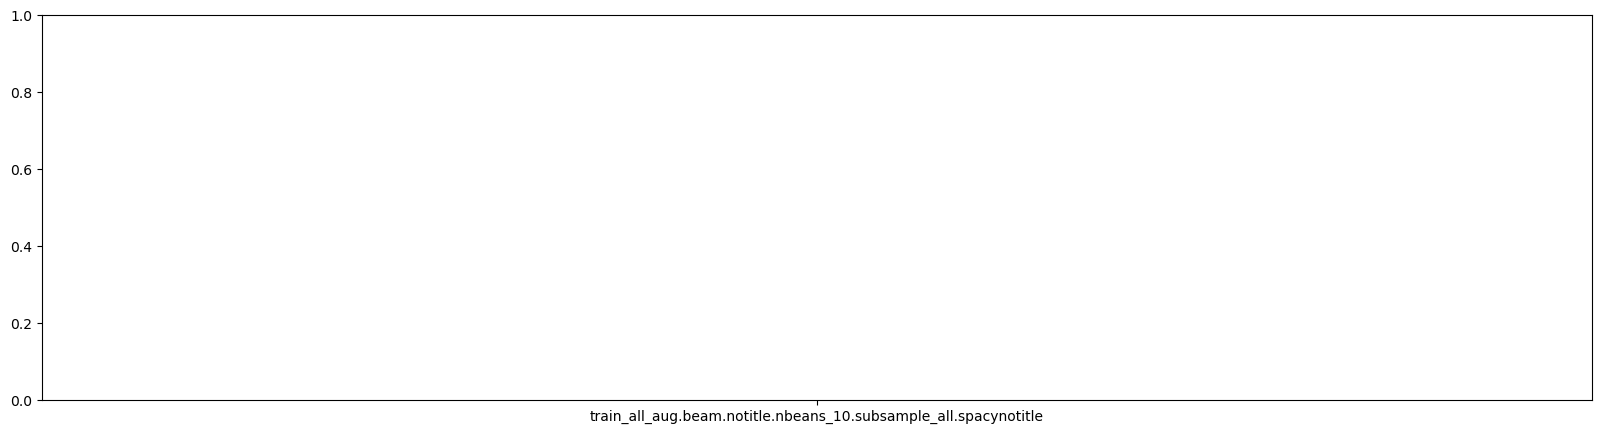

In [22]:
x = score_figures.keys()
fig = plt.figure(figsize=(20, 5))
plt.bar(x, means, yerr=stds, alpha=0.5, ecolor="black", capsize=10)
plt.hlines(np.max(means), -20, 80, colors="red", label="Max")
plt.hlines(np.min(means), -20, 80, colors="blue", label="Min")
fig.autofmt_xdate()
plt.legend()
plt.show()


In [23]:
# lets do a boxplot of groups
# grouping : (title_in_summary, title_when_spacy)
groups = {
    "both titles": list(filter(lambda s: ".title" in s and "spacytitle" in s and "aug" in s, scores)),
    "title in summary only": list(filter(lambda s: ".title" in s and "spacynotitle" in s and "aug" in s, scores)),
    "title in spacy only": list(filter(lambda s: ".notitle" in s and "spacytitle" in s and "aug" in s, scores)),
    "no titles": list(filter(lambda s: ".notitle" in s and "spacynotitle" in s and "aug" in s, scores)),
}
groups

{'both titles': ['train_all_aug.beam.title.nbeans_10.subsample_all.spacytitle',
  'train_all_aug.beam.title.nbeans_10.subsample_one_per_source.spacytitle',
  'train_all_aug.beam.title.nbeans_10.subsample_unique_text.spacytitle',
  'train_all_aug.contrastive.alpha_0_6.title.subsample_all.spacytitle',
  'train_all_aug.contrastive.alpha_0_6.title.subsample_one_per_source.spacytitle',
  'train_all_aug.contrastive.alpha_0_6.title.subsample_unique_text.spacytitle',
  'train_all_aug.greedy.title.subsample_all.spacytitle',
  'train_all_aug.greedy.title.subsample_one_per_source.spacytitle',
  'train_all_aug.greedy.title.subsample_unique_text.spacytitle',
  'train_all_aug.top_k.k_640.title.subsample_all.spacytitle',
  'train_all_aug.top_k.k_640.title.subsample_one_per_source.spacytitle',
  'train_all_aug.top_k.k_640.title.subsample_unique_text.spacytitle',
  'train_all_aug.top_p.p_0_95.title.subsample_all.spacytitle',
  'train_all_aug.top_p.p_0_95.title.subsample_one_per_source.spacytitle',
  't

In [24]:
def map_groups_to_means(groups: list[str]):
    # extract indices in "scores"
    indices = list(map(scores.index, groups))
    # return means at those indices
    return means[indices]

group_figures = list(map(map_groups_to_means, groups.values()))
group_figures

[array([0.83052362, 0.83216578, 0.83179042, 0.83271235, 0.83168054,
        0.83300157, 0.83368868, 0.83172742, 0.8325891 , 0.83261926,
        0.83244063, 0.83236566, 0.8331895 , 0.83338482, 0.83168269]),
 array([0.80430824, 0.80666115, 0.80574487, 0.80586851, 0.80741576,
        0.808631  , 0.80378593, 0.80714466, 0.80571771, 0.80603893,
        0.80686492, 0.80520693, 0.80623478, 0.80750061, 0.80591383]),
 array([0.82724228, 0.83119724, 0.82970438, 0.83189204, 0.83307081,
        0.82919296, 0.83075951, 0.83387129, 0.83075511, 0.83231561,
        0.83179569, 0.83145115, 0.83099754, 0.83317726, 0.83098122]),
 array([0.8025139 , 0.8053565 , 0.80276945, 0.8050738 , 0.80651832,
        0.80199966, 0.80369545, 0.80659635, 0.80520005, 0.80354342,
        0.80774332, 0.80365977, 0.80538669, 0.80500164, 0.80515929])]

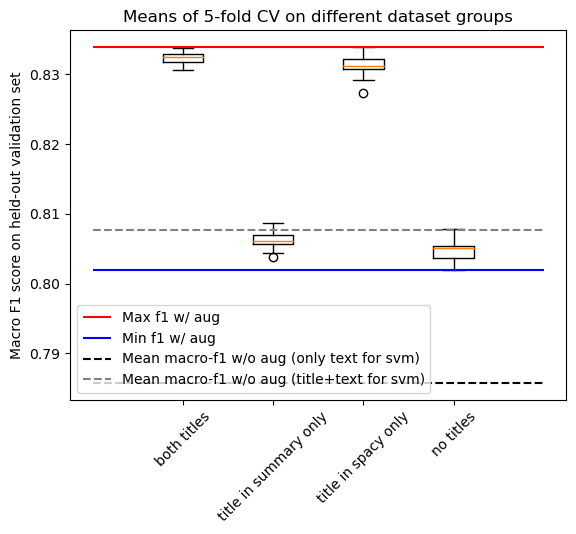

In [31]:
bp = plt.boxplot(group_figures)
# for i, whisker in enumerate(bp['whiskers']):
#     x = whisker.get_xydata()[1][0]
#     for j in group_figures[i]:
#         plt.plot(x, j, 'o', alpha=0.5)
plt.xticks(ticks=range(1,5), labels=groups, rotation=45)
plt.hlines(np.max(means), 0, 5, colors="red", label="Max f1 w/ aug")
plt.hlines(np.min(means), 0, 5, colors="blue", label="Min f1 w/ aug")
plt.hlines(np.mean(score_figures["train_all.spacynotitle"]), 0, 5, linestyles="dashed", colors="black", label="Mean macro-f1 w/o aug (only text for svm)")
plt.hlines(np.mean(score_figures["train_all.spacytitle"]), 0, 5, linestyles="dashed", colors="grey", label="Mean macro-f1 w/o aug (title+text for svm)")
plt.ylabel("Macro F1 score on held-out validation set")
plt.title("Means of 5-fold CV on different dataset groups")
plt.legend()
plt.show()